In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train[0]

5

In [7]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [8]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x_train[0].shape

(28, 28)

In [10]:
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    img_scaled = cv2.resize(img, None, fx=5, fy=5, interpolation = cv2.INTER_NEAREST)
    cv2.imshow("Randon Sample", img_scaled)
    cv2.waitKey(0)

cv2.destroyAllWindows() 

1
2
3
9
9
7


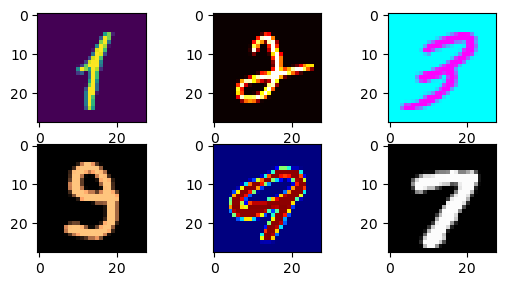

In [11]:
# 331 --> no. of rows, no. of columns, position of the plot
# cmap --> color map
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
print(y_train[random_num])
plt.imshow(x_train[random_num], cmap=plt.get_cmap('viridis'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
print(y_train[random_num])
plt.imshow(x_train[random_num], cmap=plt.get_cmap('hot'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
print(y_train[random_num])
plt.imshow(x_train[random_num], cmap=plt.get_cmap('cool'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
print(y_train[random_num])
plt.imshow(x_train[random_num], cmap=plt.get_cmap('copper'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
print(y_train[random_num])
plt.imshow(x_train[random_num], cmap=plt.get_cmap('jet'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
print(y_train[random_num])
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### PREPARE DATASET FOR TRAINING

In [12]:
img_row = x_train[0].shape[0]
img_col = x_train[0].shape[1]

In [13]:
img_row, img_col

(28, 28)

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train = x_train.reshape(x_train.shape[0], img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1)

In [16]:
input_shape = (img_row, img_col, 1)

In [17]:
input_shape

(28, 28, 1)

In [18]:
type(x_train)

numpy.ndarray

In [19]:
x_train.dtype

dtype('uint8')

In [20]:
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

In [21]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

In [22]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train.shape, x_test.shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 28, 28, 1) (10000, 28, 28, 1)


### ONE HOT ENCODING

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
y_train.shape

(60000, 10)

In [27]:
print ("Number of Classes: " + str(y_test.shape[1]))
print(y_test.shape)
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
print(num_pixels) # 28*28

Number of Classes: 10
(10000, 10)
784


### MODEL

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()

In [29]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

In [30]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [32]:
# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(128, activation='relu'))

In [35]:
model.add(Dropout(0.5))

In [36]:
model.add(Dense(num_classes, activation='softmax'))

In [37]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

In [38]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### TRAIN THE MODEL

In [39]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5926 - accuracy: 0.8135 - val_loss: 0.1935 - val_accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2899 - accuracy: 0.9121 - val_loss: 0.1300 - val_accuracy: 0.9604
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2157 - accuracy: 0.9362 - val_loss: 0.0966 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1666 - accuracy: 0.9505 - val_loss: 0.0782 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1370 - accuracy: 0.9592 - val_loss: 0.0654 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1211 - accuracy: 0.9647 - val_loss: 0.0548 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1073 - accuracy: 0.9679 - val_loss: 0.0498 -

### PLOTTING LOSS AND ACCURACY

In [40]:
x_test[0].shape

(28, 28, 1)

In [41]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1875}

In [42]:
history.history

{'loss': [0.5925777554512024,
  0.28985360264778137,
  0.21572551131248474,
  0.1665642112493515,
  0.13704143464565277,
  0.12106060236692429,
  0.10732327401638031,
  0.0974731370806694,
  0.09017243981361389,
  0.08440497517585754],
 'accuracy': [0.8134833574295044,
  0.9120833277702332,
  0.9361500144004822,
  0.9504500031471252,
  0.9592333436012268,
  0.9646833539009094,
  0.9679166674613953,
  0.9712499976158142,
  0.9729333519935608,
  0.9746500253677368],
 'val_loss': [0.19352374970912933,
  0.12996770441532135,
  0.09661875665187836,
  0.07822712510824203,
  0.06536021083593369,
  0.05482883378863335,
  0.049760885536670685,
  0.045780789107084274,
  0.04553268849849701,
  0.04322466999292374],
 'val_accuracy': [0.9430999755859375,
  0.9603999853134155,
  0.9707000255584717,
  0.975600004196167,
  0.9782999753952026,
  0.9822999835014343,
  0.9846000075340271,
  0.9854000210762024,
  0.9835000038146973,
  0.9858999848365784]}

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Loss')

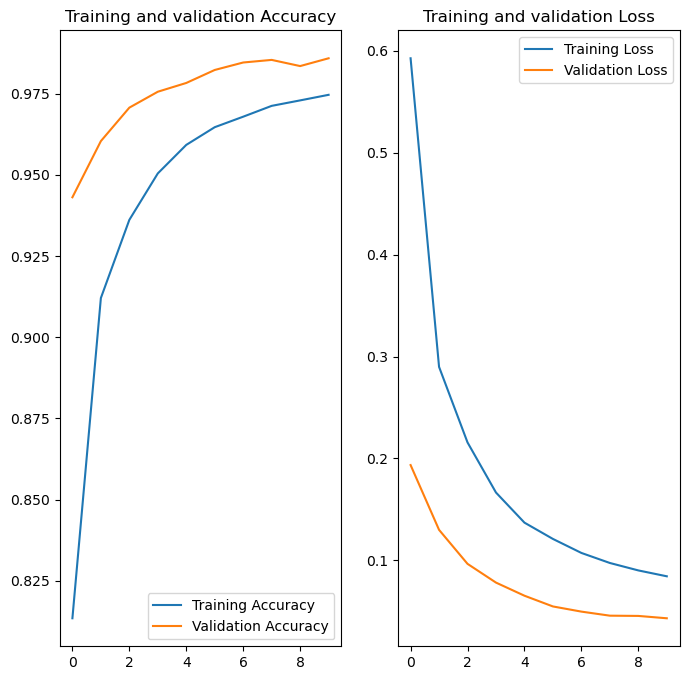

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label="Training Accuracy")
plt.plot(range(epochs), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label="Training Loss")
plt.plot(range(epochs), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and validation Loss')

In [45]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


/Users/chahakjadon/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

In [47]:
classifier

In [68]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    # image: to put border around, pixels to be added: top, bottom, left, right, border type, border color
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, input_im.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # image, text, position, font, font size, color, thickness
    cv2.putText(expanded_image, str(pred), (150, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    predicted_probabilities = classifier.predict(input_im, verbose=0)
    predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
    draw_test("Prediction", predicted_class, imageL) 
    cv2.waitKey(0)

### TESTING ON REAL DATA

In [115]:
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        # for x axis: M['m10']/M['m00'] & for y axis: M['m01']/M['m00']
        return (int(M['m10']/M['m00']))
    else:
        pass

def makeSquare(image):
    height, width = image.shape[:2]
    if height == width:
        return image
    elif height > width:
        diff = (height - width) // 2
        padded_image = cv2.copyMakeBorder(image, diff, diff, diff, diff, cv2.BORDER_CONSTANT, value=0)
        return padded_image
    else:
        diff = (width - height) // 2
        cropped_image = image[diff:diff + height, :]
        return cropped_image


def resize_to_pixel(dimension, image):
    img_scaled = cv2.resize(image, (dimension,dimension), interpolation = cv2.INTER_CUBIC)
    return img_scaled


In [116]:
image = cv2.imread('images/39.jpeg')

# crop the picture if required
# Define the number of pixels to crop from all sides
crop_pixels = 22

# Calculate the cropping boundaries
h, w = image.shape[:2]
x = crop_pixels
y = crop_pixels
crop_width = w - 2 * crop_pixels
crop_height = h - 2 * crop_pixels

# Crop the image
cropped_image = image[y:y+crop_height, x:x+crop_width]

# Display the original and cropped images
cv2.imshow('Original Image', image)
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [117]:
import numpy as np
import cv2
       
gray = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow("blurred", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

edged = cv2.Canny(blurred, 30, 150)
cv2.imshow("edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    # (x,y) --> top-left co-ordinate of the rectangle for contour
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        # roi: REGION OF INTEREST, it extracted a rectangle
        roi = blurred[y:y + h, x:x + w]
        # threshold: gray --> binary
        # roi(region of interest i.e. rectangle), threshold(value equal to or below will be 0), max_val(value exceeding
        # threshold (127) will be equal to the max value (255))
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        
        predicted_probabilities = classifier.predict(roi,1, verbose=0)
        predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
        full_number.append(str(predicted_class))
        cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(cropped_image, str(predicted_class), (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", cropped_image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

The number is: 3939
